# 0. 문제 정의

### [ 배경 ]
> 다양한 개인적 특성을 바탕으로 한 데이터를 활용하여 소득 수준을 예측하는 것을 목표로 한다.
>
> 제공된 개인 특성 데이터를 기반으로 한 알고리즘 개발을 통해 개인의 소득 수준을 예측함으로써 사회적 문제 해결에 기여할 수 있는 기회가 될 것이다.
>
> 또한, 단순히 개인 소득 수준을 에측하는 것을 넘어, 다양한 개인적 특성 데이터를 분석하고 이해하는 능력을 키우며, 이를 통해 AI 역량과 경험을 한 단계 더 발전시키는 것이다.

### [ 주제 ]
> 개인 특성 데이터를 활용하여 개인 소득 수준을 예측하는 AI 모델 개발

### [ 규칙 ]
> 1. 평가
> - 평가산식: RMSE
> - Public Score: 전체 테스트 데이터 중 30%
> - Private Score: 전체 테스트 데이터 중 70%
>
> 2. 참여 규칙
> - `개인으로만 참여 가능`
>
> 3. 외부 데이터 및 사전 학습 모델
> - `외부 데이터 사용 불가`
> - 사용에 법적 제한이 없으며 논문으로 공개된 베이스의 사전 학습 모델(Pre-trained Model) 사용 가능
>
> 4. AutoML 패키지
> - `모든 AutoML 패키지 사용 불가능`
>
> 5. 유의 사항
> - 1일 최대 제출 횟수: 3회
> - `모델 학습에서 평가 데이터셋 활용(Data Leakage)시 수상 제외`

# 1. 데이터 불러오기

In [1]:
# 기초 라이브러리 import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 데이터의 파일 경로 설정 및 파일 이름 확인
import os

path = os.getcwd() + '/data'
data_files = os.listdir(path)
print('Data files: ', data_files)

Data files:  ['sample_submission.csv', 'test.csv', 'train.csv']


In [3]:
train_origin = pd.read_csv(path+'/train.csv')  # train 데이터 불러오기
test_origin = pd.read_csv(path+'/test.csv')    # test 데이터 불러오기
train_origin.shape, test_origin.shape    # 데이터 정보 확인

((20000, 23), (10000, 22))

In [4]:
# EDA 및 전처리 handling을 위한 복사본 생성
train = train_origin.copy()

In [5]:
train.head(5)

,ID,Age,Gender,Education_Status,Employment_Status,Working_Week (Yearly),Industry_Status,Occupation_Status,Race,Hispanic_Origin,...,Citizenship,Birth_Country,Birth_Country (Father),Birth_Country (Mother),Tax_Status,Gains,Losses,Dividends,Income_Status,Income
0,TRAIN_00000,63,M,Middle (7-8),Full-Time,4,Social Services,Services,White,All other,...,Native,US,US,US,Nonfiler,0,0,0,Unknown,425
1,TRAIN_00001,37,M,Associates degree (Vocational),Full-Time,52,Entertainment,Services,White,All other,...,Native,US,US,US,Single,0,0,0,Under Median,0
2,TRAIN_00002,58,F,High graduate,Full-Time,52,Manufacturing (Non-durable),Admin Support (include Clerical),Black,All other,...,Native,US,US,US,Married Filling Jointly both under 65 (MFJ),3411,0,0,Under Median,860
3,TRAIN_00003,44,M,High graduate,Full-Time,52,Retail,Technicians & Support,White,All other,...,Native,US,US,US,Single,0,0,0,Under Median,850
4,TRAIN_00004,37,F,High graduate,Full-Time,52,Retail,Sales,White,All other,...,Native,US,US,US,Head of Household (HOH),0,0,0,Unknown,570


# 2. EDA & Preprocessing

In [6]:
train.info()    # 데이터 정보 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ID                      20000 non-null  object
 1   Age                     20000 non-null  int64 
 2   Gender                  20000 non-null  object
 3   Education_Status        20000 non-null  object
 4   Employment_Status       20000 non-null  object
 5   Working_Week (Yearly)   20000 non-null  int64 
 6   Industry_Status         20000 non-null  object
 7   Occupation_Status       20000 non-null  object
 8   Race                    20000 non-null  object
 9   Hispanic_Origin         20000 non-null  object
 10  Martial_Status          20000 non-null  object
 11  Household_Status        20000 non-null  object
 12  Household_Summary       20000 non-null  object
 13  Citizenship             20000 non-null  object
 14  Birth_Country           20000 non-null  object
 15  Bi

> - 결측치가 하나도 없다..!
> - object 변수가 많이 관측된다. -> `데이터의 특성을 비교하여 별도의 처리가 필요할 것으로 보인다`

In [7]:
train.columns

Index(['ID', 'Age', 'Gender', 'Education_Status', 'Employment_Status',
       'Working_Week (Yearly)', 'Industry_Status', 'Occupation_Status', 'Race',
       'Hispanic_Origin', 'Martial_Status', 'Household_Status',
       'Household_Summary', 'Citizenship', 'Birth_Country',
       'Birth_Country (Father)', 'Birth_Country (Mother)', 'Tax_Status',
       'Gains', 'Losses', 'Dividends', 'Income_Status', 'Income'],
      dtype='object')

In [8]:
# 데이터 요약 정보 확인 함수 정의
def resumetable(df):
    print(f'Data Shape: {df.shape}')
    summary = pd.DataFrame(df.dtypes, columns=['dtypes'])
    summary = summary.reset_index()
    summary = summary.rename(columns={'index': 'Feature'})
    summary['Missing'] = df.isnull().sum().values
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.iloc[0].values
    summary['Second Value'] = df.iloc[1].values

    return summary

resumetable(train)

Data Shape: (20000, 23)


,Feature,dtypes,Missing,Uniques,First Value,Second Value
0,ID,object,0,20000,TRAIN_00000,TRAIN_00001
1,Age,int64,0,91,63,37
2,Gender,object,0,2,M,M
3,Education_Status,object,0,17,Middle (7-8),Associates degree (Vocational)
4,Employment_Status,object,0,8,Full-Time,Full-Time
5,Working_Week (Yearly),int64,0,53,4,52
6,Industry_Status,object,0,24,Social Services,Entertainment
7,Occupation_Status,object,0,15,Services,Services
8,Race,object,0,5,White,White
9,Hispanic_Origin,object,0,10,All other,All other


> 각각의 변수에 대한 특징을 살펴본 결과 우선은 ID를 제외한 나머지 feaeture는 모두 사용해야 할 것으로 보인다.

> 먼저 수치형 데이터인 Age, Gains, Losses, Dividends, Income에 대한 시각화를 진행해보자.

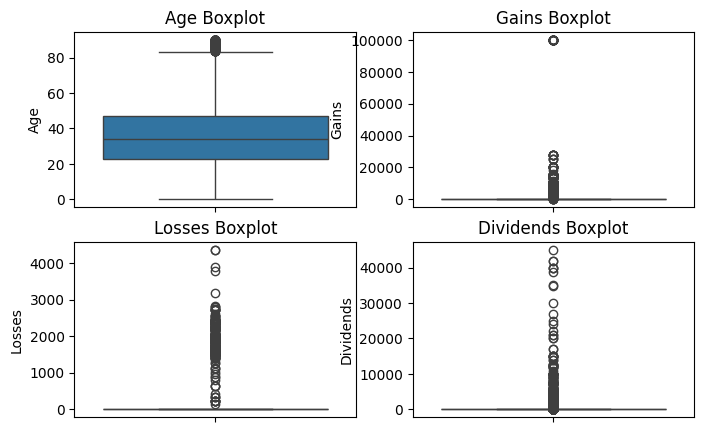

In [9]:
# Age와 Gains, Losses, Dividends의 박스플롯 2x2 subplot 형태로 시각화
plt.figure(figsize=(8, 5))

plt.subplot(2, 2, 1)
sns.boxplot(y='Age', data=train)
plt.title('Age Boxplot')

plt.subplot(2, 2, 2)
sns.boxplot(y='Gains', data=train)
plt.title('Gains Boxplot')

plt.subplot(2, 2, 3)
sns.boxplot(y='Losses', data=train)
plt.title('Losses Boxplot')

plt.subplot(2, 2, 4)
sns.boxplot(y='Dividends', data=train)
plt.title('Dividends Boxplot')

plt.show()

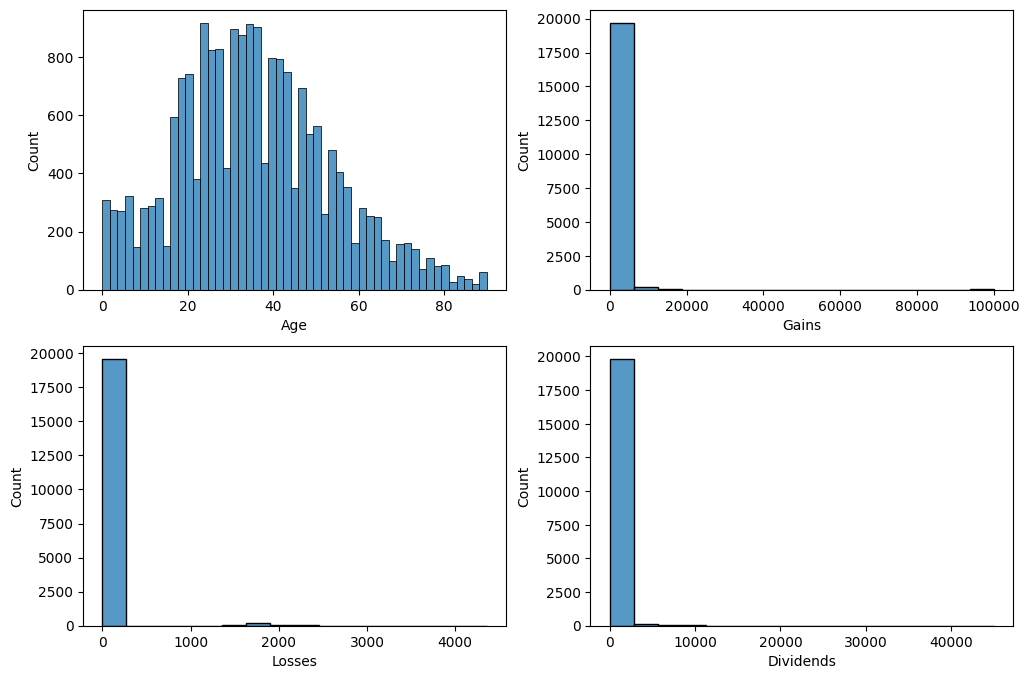

In [10]:
# Age와 Gains, Losses, Dividends의 히스토그램 2x2 subplot 형태로 시각화
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.histplot(train['Age'])

plt.subplot(2, 2, 2)
sns.histplot(train['Gains'])

plt.subplot(2, 2, 3)
sns.histplot(train['Losses'])

plt.subplot(2, 2, 4)
sns.histplot(train['Dividends'])

plt.show()

> Age를 제외한 feature의 경우 이상치가 압도적으로 많으며, 대부분은 0에 해당하는 값임을 알 수 있다.

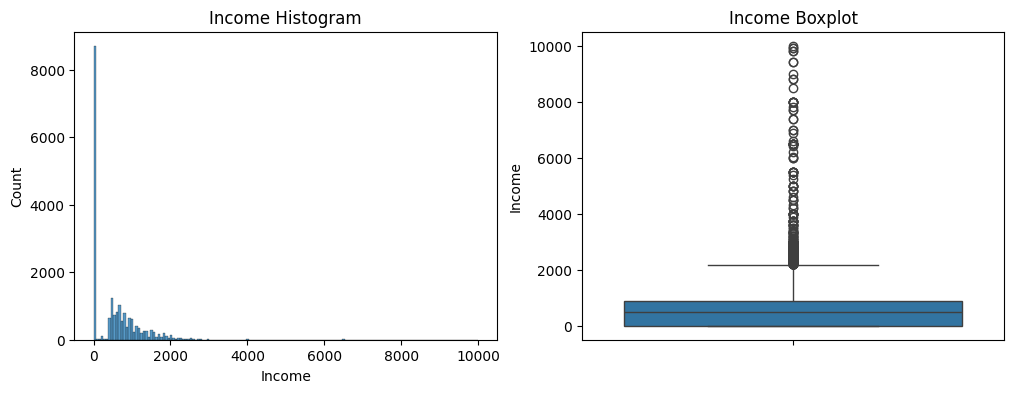

In [11]:
# Income 시각화
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.histplot(train['Income'])
plt.title('Income Histogram')

plt.subplot(1, 2, 2)
sns.boxplot(y='Income', data=train)
plt.title('Income Boxplot')

plt.show()

> Income의 경우에도 분포가 굉장히 불균형하다는 점을 있음을 알 수 있으며, 0인 경우가 많이 관측된다.
>
> 소득이 0인 집단과 0이 아닌 집단으로 나누어 분석을 진행하는 편이 나을 것으로 추측된다.

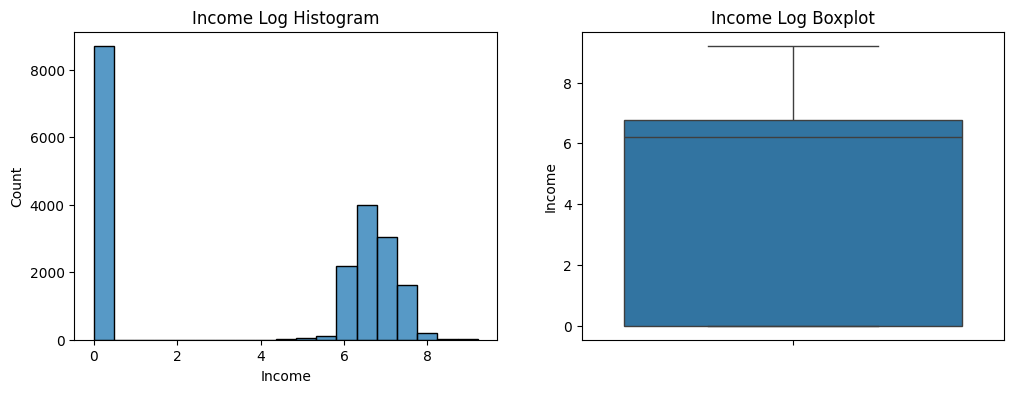

In [36]:
# Income을 로그 변환하여 시각화
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.histplot(np.log1p(train['Income']))
plt.title('Income Log Histogram')

plt.subplot(1, 2, 2)
sns.boxplot(y=np.log1p(train['Income']))
plt.title('Income Log Boxplot')

plt.show()

In [29]:
train.columns

Index(['ID', 'Age', 'Gender', 'Education_Status', 'Employment_Status',
       'Working_Week (Yearly)', 'Industry_Status', 'Occupation_Status', 'Race',
       'Hispanic_Origin', 'Martial_Status', 'Household_Status',
       'Household_Summary', 'Citizenship', 'Birth_Country',
       'Birth_Country (Father)', 'Birth_Country (Mother)', 'Tax_Status',
       'Gains', 'Losses', 'Dividends', 'Income_Status', 'Income'],
      dtype='object')

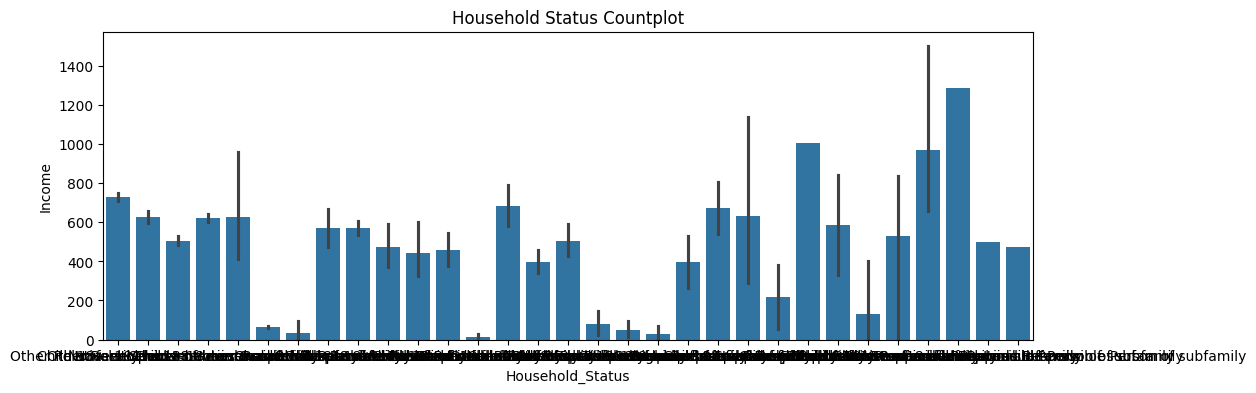

In [30]:
# Household Status와 Household Summary 시각화
plt.figure(figsize=(12, 4))

sns.barplot(x='Household_Status', y='Income', data=train)
plt.title('Household Status Countplot')
plt.show()

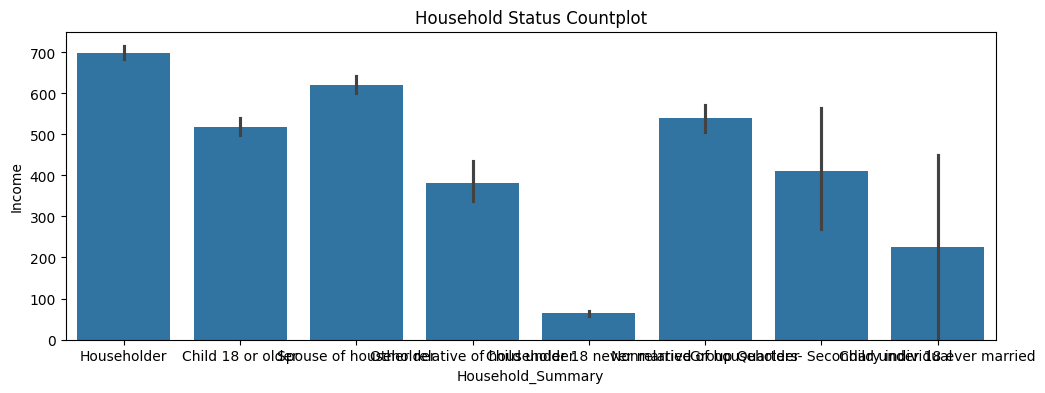

In [31]:
# Household Status와 Household Summary 시각화
plt.figure(figsize=(12, 4))

sns.barplot(x='Household_Summary', y='Income', data=train)
plt.title('Household Status Countplot')
plt.show()

In [25]:
# 수치형 데이터와 Income 간의 상관관계 파악
train[['Age', 'Gains', 'Losses', 'Dividends', 'Income']].corr()

,Age,Gains,Losses,Dividends,Income
Age,1.000000,0.044156,0.053384,0.107565,0.124795
Gains,0.044156,1.000000,-0.013313,0.081115,0.009555
Losses,0.053384,-0.013313,1.000000,0.015351,0.036502
Dividends,0.107565,0.081115,0.015351,1.000000,0.002449
Income,0.124795,0.009555,0.036502,0.002449,1.000000


In [13]:
# Income에 따른 특징을 살펴보기 위해 데이터 분할
zero_income = train[train['Income'] == 0]
non_zero_income = train[train['Income'] != 0]

In [14]:
zero_income.shape, non_zero_income.shape

((8697, 23), (11303, 23))

### (1) 소득이 0인 집단

In [14]:
resumetable(zero_income)    # 소득이 0인 집단 자료 요약

Data Shape: (8697, 23)


,Feature,dtypes,Missing,Uniques,First Value,Second Value
0,ID,object,0,8697,TRAIN_00001,TRAIN_00006
1,Age,int64,0,91,37,67
2,Gender,object,0,2,M,M
3,Education_Status,object,0,17,Associates degree (Vocational),Middle (7-8)
4,Employment_Status,object,0,8,Full-Time,Children or Armed Forces
5,Working_Week (Yearly),int64,0,52,52,0
6,Industry_Status,object,0,24,Entertainment,Not in universe or children
7,Occupation_Status,object,0,15,Services,Unknown
8,Race,object,0,5,White,White
9,Hispanic_Origin,object,0,10,All other,All other


> 우선 Income이 0인 사람들의 특징을 잘 나타낼 수 있는 몇몇의 핵심 feature를 살펴보자.

In [15]:
zero_income['Employment_Status'].value_counts()     # 고용 상태 분포

Employment_Status
Children or Armed Forces         5531
Full-Time                        1598
Not Working                      1221
Choice Part-Time                  137
Seeking Full-Time                 105
Part-Time (Usually Part-Time)      43
Seeking Part-Time                  39
Part-Time (Usually Full-Time)      23
Name: count, dtype: int64

Employment_Statu의 분포를 살펴보았을 때, 대부분의 경우 `Children or Armed Forces`가 차지하고 있으며, `특이하게 Full-Time인데도 소득이 0인 경우가 관찰`된다.
- *** Full-Time으로 일을 하는데 Income이 0인 경우는 어떤지 살펴볼 필요가 있을 것 같다.

In [16]:
zero_income['Working_Week (Yearly)'].value_counts().head()      # 일을 한 시간(주) 분포

Working_Week (Yearly)
0     4447
52    2879
40     109
50      86
48      83
Name: count, dtype: int64

> Income이 0인 대부분의 사람의 노동 시간(Working_Week)은 0으로 나타난다. 하지만, 일부 위의 Full-Time처럼 52주 모두 일을 했음에도 Income이 0인 사람도 많이 관측된다.

In [17]:
zero_income['Industry_Status'].value_counts().head()    # 산업 분포

Industry_Status
Not in universe or children    4688
Retail                          699
Education                       360
Manufacturing (Durable)         309
Manufacturing (Non-durable)     303
Name: count, dtype: int64

> 또한 대부분의 경우 아이나 학생인 것으로 확인이 된다.

#### [ Insight1 ] 일을 하지 않은 사람들(Not Working)은 소득이 0이다.

In [18]:
# Employment_Status가 Not Working인 모든 사람의 Income은 0이다!
train[train['Employment_Status'] == 'Not Working']['Income'].value_counts()

Income
0    1221
Name: count, dtype: int64

> Employment_Status가 Not Working인 사람의 경우 모두 소득이 0으로 집계되었다!
> - Gain, Losses, Dividends 등 수익의 종류가 나누어져있는 시점에서, Income의 경우 일을 하는 여부에 따라 정해지는 경향이 있는 것으로 보인다.<br>즉, 일을 한다고 모두 소득이 있다고는 할 수 없을지언정 `일을 하지 않은 이들은 모두 소득이 없는 것으로 보인다.`

#### [ Insight2 ] Education_Status가 청소년(Children)인 경우 소득이 0이다.

In [120]:
# Education_Status에 따른 소득 평균을 살펴보면 Children의 전체 소득은 0이다.
train.groupby('Education_Status')[['Income']].mean().sort_values(by='Income', ascending=False).T

Education_Status,Associates degree (Vocational),Associates degree (Academic),Bachelors degree,High graduate,College,Masters degree,Doctorate degree,Professional degree,High Junior,High Senior,High Sophomore,High Freshman,Middle (7-8),Elementary (1-4),Elementary (5-6),Kindergarten,Children
Income,867.269906,782.740558,699.367076,664.65214,651.468108,616.10297,575.528736,547.036036,483.034146,459.942149,408.658323,366.794595,346.883212,343.44,325.116719,187.640625,0.0


In [32]:
train[train['Education_Status']=='Children'].shape

(2208, 23)

> Education_Status가 Children인 사람의 경우 모두 Income이 0으로 확인되었다.
> - 또한 학력이 높음에 따라 소득 수준이 높아지는 경향이 약간 보인다(순서형 자료로 생각해야 할 수도 있을 것 같다)

### (2) 소득이 0이 아닌 집단

In [34]:
resumetable(non_zero_income)    # 소득이 0이 아닌 집단 자료 요약

Data Shape: (11303, 23)


,Feature,dtypes,Missing,Uniques,First Value,Second Value
0,ID,object,0,11303,TRAIN_00000,TRAIN_00002
1,Age,int64,0,70,63,58
2,Gender,object,0,2,M,F
3,Education_Status,object,0,16,Middle (7-8),High graduate
4,Employment_Status,object,0,7,Full-Time,Full-Time
5,Working_Week (Yearly),int64,0,53,4,52
6,Industry_Status,object,0,22,Social Services,Manufacturing (Non-durable)
7,Occupation_Status,object,0,13,Services,Admin Support (include Clerical)
8,Race,object,0,5,White,Black
9,Hispanic_Origin,object,0,10,All other,All other


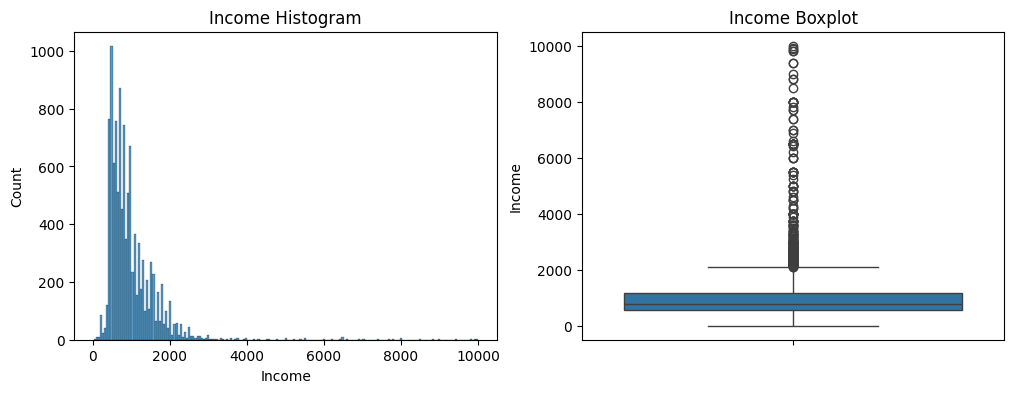

In [36]:
# Income 분포 시각화
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.histplot(non_zero_income['Income'])
plt.title('Income Histogram')

plt.subplot(1, 2, 2)
sns.boxplot(y='Income', data=non_zero_income)
plt.title('Income Boxplot')

plt.show()

> 소득이 0인 경우를 제외하더라도 꽤 많은 이상치로 인해 치우친 분포가 나타난다.

해야할 거
1. ~~소득이 0인 경우를 제외한 Income의 분포 확인~~
2. Working_Week (Yearly)가 52인 경우 즉, Full-Time으로 일하는데 소득이 0인 사람이 많이 보이는데 그 이유를 살펴보자.
3. ~~Employment_Status == Children or Armed Forces의 소득이 전체가 0인가 확인~~
   - 다 그렇지는 않다.
4. 소득이 0이 아닌 사람의 전반적인 특징 확인
5. ~~각 feature에서 이상치 처리해야하는지 여부 확인~~

In [52]:
train[train['Working_Week (Yearly)'] == 52]['Income'].value_counts()

Income
0       2879
800      367
700      357
500      356
600      319
        ... 
1715       1
2299       1
1701       1
1212       1
2373       1
Name: count, Length: 1096, dtype: int64

In [104]:
zero_income[zero_income['Working_Week (Yearly)'] == 52]

,ID,Age,Gender,Education_Status,Employment_Status,Working_Week (Yearly),Industry_Status,Occupation_Status,Race,Hispanic_Origin,...,Citizenship,Birth_Country,Birth_Country (Father),Birth_Country (Mother),Tax_Status,Gains,Losses,Dividends,Income_Status,Income
1,TRAIN_00001,37,M,Associates degree (Vocational),Full-Time,52,Entertainment,Services,White,All other,...,Native,US,US,US,Single,0,0,0,Under Median,0
8,TRAIN_00008,24,F,Bachelors degree,Children or Armed Forces,52,Retail,Sales,White,All other,...,Native,US,US,US,Single,0,0,0,Under Median,0
10,TRAIN_00010,56,F,High graduate,Children or Armed Forces,52,Hospitals,Services,Black,All other,...,Native,US,US,US,Married Filling Jointly one over 65 & one unde...,0,0,0,Under Median,0
14,TRAIN_00014,44,M,High graduate,Children or Armed Forces,52,Public Administration,Protective Services,White,All other,...,Native,US,US,US,Married Filling Jointly both under 65 (MFJ),0,0,200,Over Median,0
26,TRAIN_00026,40,M,College,Children or Armed Forces,52,Medical (except Hospitals),Professional,White,All other,...,Native,US,US,US,Married Filling Jointly both under 65 (MFJ),0,0,0,Under Median,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19937,TRAIN_19937,20,M,High Sophomore,Full-Time,52,Manufacturing (Non-durable),Machine Operators & Inspectors,White,All other,...,Native,US,US,US,Single,0,0,0,Under Median,0
19946,TRAIN_19946,33,M,College,Children or Armed Forces,52,Manufacturing (Durable),Professional,White,All other,...,Native,US,US,US,Single,0,0,75,Under Median,0
19977,TRAIN_19977,70,F,High graduate,Full-Time,52,Education,Admin Support (include Clerical),White,All other,...,Native,US,US,US,Married Filling Jointly both over 65 (MFJ),0,0,0,Under Median,0
19978,TRAIN_19978,75,M,High graduate,Choice Part-Time,52,Finance Insurance & Real Estate,Sales,White,All other,...,Native,US,US,US,Nonfiler,0,0,456,Unknown,0


In [122]:
# Education_Status에 따른 소득 평균을 살펴보면 Children의 전체 소득은 0이다.
train.groupby('Income_Status')[['Income']].median().sort_values(by='Income', ascending=False).T

Income_Status,Over Median,Under Median,Unknown
Income,500.0,500.0,475.0


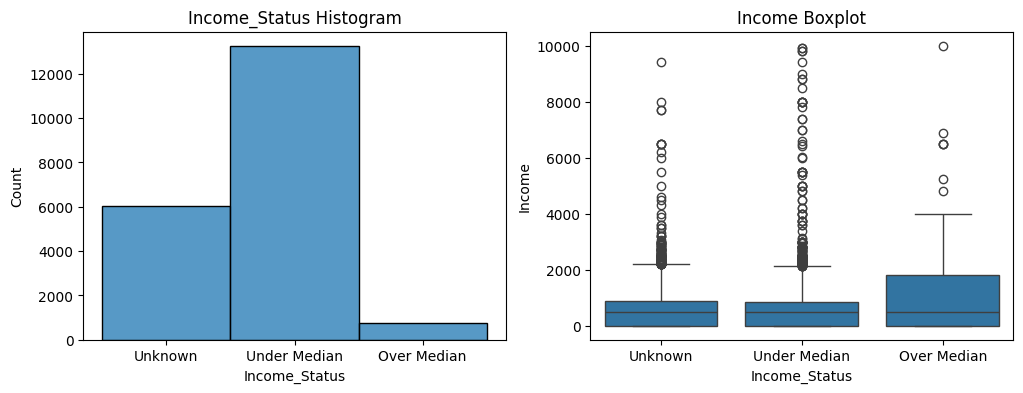

In [123]:
# Income_Status별 분포 시각화
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.histplot(train['Income_Status'])
plt.title('Income_Status Histogram')

plt.subplot(1, 2, 2)
sns.boxplot(y='Income', x='Income_Status', data=train)
plt.title('Income Boxplot')

plt.show()

### Isolation Forest를 통한 이상치 탐지

In [58]:
# 수치형 데이터 이상치 탐지
numerical = ['Age', 'Gains', 'Losses', 'Dividends', 'Income']

In [124]:
# Isolation Forest를 통한 이상치 탐지
from sklearn.ensemble import IsolationForest

clf = IsolationForest(max_samples=100, contamination=0.01, random_state=42)
clf.fit(train[['Income']])

y_pred_train = clf.predict(train[['Income']])

train['Outlier'] = y_pred_train

In [130]:
train[train['Outlier'] == -1]['Income'].min()

2532

<Axes: ylabel='Income'>

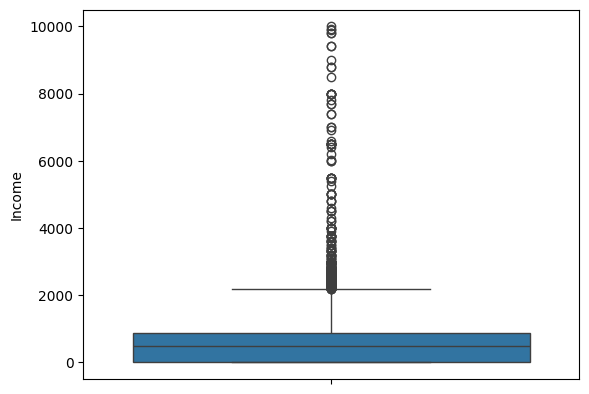

In [128]:
sns.boxplot(y='Income', data=train )

In [103]:
# train['Dividends']의 boxplot 이상치 경계 값 확인
Q1 = train[train['Dividends']>0]['Dividends'].quantile(0.25)
Q3 = train[train['Dividends']>0]['Dividends'].quantile(0.75)
IQR = Q3 - Q1
outlier_min = Q1 - 1.5 * IQR
outlier_max = Q3 + 1.5 * IQR
print('Outlier Min: ', outlier_min)
print('Outlier Max: ', outlier_max)

Outlier Min:  -1155.25
Outlier Max:  2058.75


In [98]:
train[train['Outlier'] == -1]['Dividends'].min()

2700

In [78]:
train[train['Dividends'] > 15000].count()

ID                        20
Age                       20
Gender                    20
Education_Status          20
Employment_Status         20
Working_Week (Yearly)     20
Industry_Status           20
Occupation_Status         20
Race                      20
Hispanic_Origin           20
Martial_Status            20
Household_Status          20
Household_Summary         20
Citizenship               20
Birth_Country             20
Birth_Country (Father)    20
Birth_Country (Mother)    20
Tax_Status                20
Gains                     20
Losses                    20
Dividends                 20
Income_Status             20
Income                    20
Outlier                   20
dtype: int64

<Axes: ylabel='Dividends'>

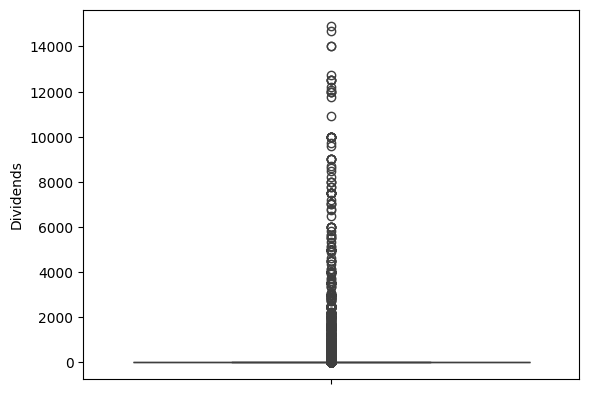

In [79]:
# Dividends 15000이상을 제외한 분포 확인
sns.boxplot(y='Dividends', data=train[train['Dividends'] < 15000])

<Axes: ylabel='Dividends'>

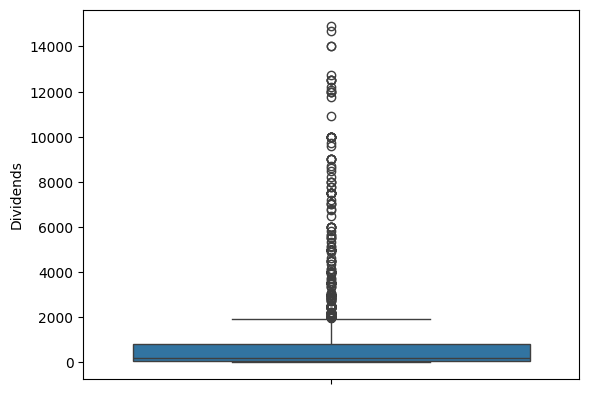

In [88]:
# Dividends 0이상을 제외한 분포 확인
sns.boxplot(y='Dividends', data = train[(0 < train['Dividends'])&(train['Dividends'] < 15000)])